# COGS 108 - Do countries with more COVID-19 cases have a higher death rate?

# Overview

In this project, we used data that included statistics on COVID-19 cases, deaths, and recoveries per country. A linear regression and machine learning mdoel was used to look at the relationship between total COVID-19 cases and death rate per country. Our analysis found that there is no relationship between cases and death rate. 

# Names

- Jade Vasquez
- Alexandra Mendoza
- Jesus Mendez
- Masiah Manzano

<a id='research_question'></a>
# Research Question

Do countries with a more total COVID-19 cases have a higher death rate?

<a id='background'></a>

## Background & Prior Work

The COVID-19 pandemic has affected everyone around the world, whether they have had the virus themselves, know someone who has had the virus, or just been affected by the restrictions that have been set in place to stop the spread. Scientists aren't sure of the COVID-19 recovery rate, but they predict it is between 97% and 99.75% (1). We cannot be sure of the statistics surrounding COVID, because we do not have information on every individual who is COVID positive. 

Given that there is not much information about who exactly is positive or not (because obviously there are too many people in the world to truly narrow it down) we mostly tried to find information about certain parts of the world. Since we wanted to focus on countries, for example, as a team we found this perfect article published by the New York Times, that is still being updated to this very day, of Covid cases in California. Although California is only a state within the U.S., finding this article helped set a precedent of the type of background we want to include. We particularly wanted to use this article as a reference for our project because it is well organized and easy to follow. The data shows us cases, testing of Covid, hospitalization due to Covid, and the number of deaths. All of this data starts from February of 2020 to now, June of 2021. Another amazing thing we really enjoyed viewing as a whole was it also showcases the “hot zones” in California of Covid cases (3). This was really helpful because this article was the only one we found with a lot of information about our topic to further progress in this project. Lastly, a beneficial aspect of this finding was also that it displayed data percentages of the total people vaccinated and those that are not vaccinated. Overall, we wanted to do our data as cleanly as this article did for California. Although our work can use some tweaks here and there, we tried our best to make sure we deliver the best we can as a team.

In addition to this, according to the research article: “Cross-County Comparison of Case Fatality Rates of Covid-19/SARS-COV-2” written by Morteza Abdullatif Khafaie and Fakher Rahim explains and provides statistical information as to the importance of analyzing and understanding recovery rates along with case fatality rates (2). This research study was conducted on an international level, which for the purpose of this project, will allow us to have a stronger understanding as to which countries had a greater recovery rate along with less death rates depending on the number of Covid-19 cases that each respective country had. Throughout this research, findings demonstrated that Italy was the country that had the highest case fatality rates on the dates of March 12th and March 23rd. However, the countries of Spain and France had a higher case fatality rate of 6.16% as of March 23, 2020. This comes to exemplify that having a further understanding of the case fatality rates at an international level allows us to “obtain detailed and accurate medical history from COVID-19 patients, and analyzing CFR alongside the recovery rate, may enable the identification of the highest risk areas so that efficient medical care may be provided”(2).



References:
- 1) https://www.webmd.com/lung/covid-recovery-overview#1
- 2) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7104689/
- 3) https://www.nytimes.com/interactive/2021/us/california-covid-cases.html 

# Hypothesis


We predict that countries who have greater COVID-19 cases, have a higher death rate. This is because we hypothesize that countries who have greater COVID-19 cases will have more hospitalizations, and thus less resources for sick patients. They may run out of supplies or medical workers to keep up with each sick patient. 

# Dataset(s)

This dataset gives us up to date statistics of the COVID-19 cases for each country. It tells us the amount of current cases, past cases, recoveries, and deaths per country. With this said, we have decided to only use this dataset and not combine any other datasets due to the fact that we want to stay as specific as possible when it comes to the countries' case fatality rates, respectively.

- Dataset Name: Covid-cases-worldwide
- Link to the dataset: https://www.kaggle.com/tanushagupta/covidcasesworldwide
- Number of observations: 219

# Setup

In [1]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Import the data that we will be using 

data = pd.read_csv('google.csv')

# Data Cleaning

In this section, we are going to clean up the data. First, we checked to see if there were any rows that did not have data. Next, we removed the columns 'Cases(words)' and 'Death(word)' because this information will not be relevent in our analyses, since we already have the number of cases in a column. Then, we renamed some of the columns, so the data will be easier to understand. Finally, we had to create two functions 'standardize_numbers()' and 'standardize_recovery()'. The standardize_numbers function was used to change all the data in the 'Number of total cases','Number of total death', and 'Recovered' columns to be in the same format, so that I can analyze them easier later on.  

In [3]:
# Remove the columns 'Cases(words)' and 'Death(word)'

data = data.drop(['Cases(words)', 'Death(word)', 'Cases(today)', 'Death(today)'], axis = 1)

In [4]:
# Rename columns 

data.rename(columns = {'Cases(num)' : 'Number of total cases', 'Death(num)' : 'Recoveries',
                       'Recovered' : 'Number of total deaths'}, inplace = True)

In [5]:
# Write a function that will remove all commas, periods, and standardize units 

def standardize_numbers(string):
    
    string = str(string)
    string = string.strip()
    if 'L' in string: 
        string = string.replace('L', '000')
    string = string.replace('.', '')
    string = string.replace(',', '')
    output = string.strip()
    if output.isnumeric() == True:
        output = int(output)
    else: 
        output = np.nan
    
    return output

In [6]:
# Use function to convert data from columns: 'Number of total cases', 'Number of total deaths', 'Recoveries'

data['Number of total cases'] = data['Number of total cases'].apply(standardize_numbers)
data['Number of total deaths'] = data['Number of total deaths'].apply(standardize_numbers)
data['Recoveries'] = data['Recoveries'].apply(standardize_numbers)

In [7]:
# Remove rows that have missing data 

data = data.dropna(axis = 0, how = 'any')

In [8]:
# Create a new column of recovery rate

x = data['Recoveries'] / data['Number of total cases']
data['Recovery Rate'] = x

In [9]:
# Create a new column of death rate

z = data['Number of total deaths'] / data['Number of total cases']
data['Death Rate'] = z

# Data Analysis & Results

In our analysis, we will be looking at the proportion of recovered COVID-19 patients in relation to the number of deaths. The reason why we decided to do this specifically is because as a team, we came to the conclusion that this would be the most beneficial way to find answers for our main topic. Since we want to answer whether or not countries will recover faster based on if their covid cases are low or high. 

- The specific variables we wanted to make sure we included were the patient information/Death numbers due to Covid.
- We made sure to store this by including it in our cells above.
- Now for the observations, we wanted to make sure the timeline of Covid was as accurate as possible for us to get the best results so we made sure to include in our findings for background information going as far back as 2020.

Now, before diving deeper into this project, as a group we met up and decided on five crucial steps in order to make sure we were efficient in results,

1. Look at our researched data
2. Try to communicate with one another on what aspects of the data we want to include
3. Re-read all of the information we have found until we are all comfortable with it
4. And lastly, make sure that the data accurately represents the numbers of deaths to recovered patients.

### Visualizations

First, we will display visualizations of the data that we will be using, to get a better understanding of the relationships. 

Visualization 1: This scatterplot shows the number of total deaths on the number of total cases per country

Visualization 2: This scatterplot shows the number of total people recovered on total cases per country

Visualization 3: This scatterplot shows the death rate on the recovery rate per country

Visualization 4: A scatter matrix of all the data in our dataframe


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


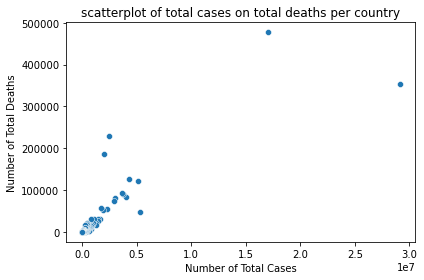

In [10]:
# Visualization 1

sns.scatterplot(data['Number of total cases'], data['Number of total deaths'])
plt.title('scatterplot of total cases on total deaths per country')
plt.xlabel('Number of Total Cases')
plt.ylabel('Number of Total Deaths')
plt.tight_layout()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


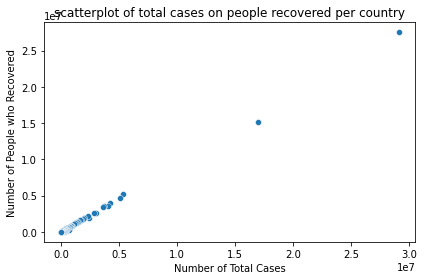

In [11]:
# Visualization 2

sns.scatterplot(data['Number of total cases'], data['Recoveries'])
plt.title('scatterplot of total cases on people recovered per country')
plt.xlabel('Number of Total Cases')
plt.ylabel('Number of People who Recovered')
plt.tight_layout()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


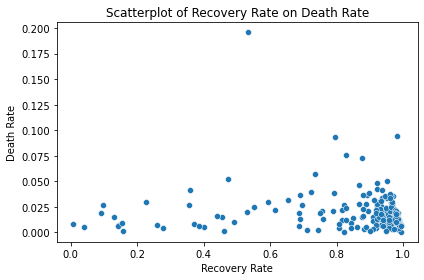

In [12]:
# Visualization 3

sns.scatterplot(data['Recovery Rate'], data['Death Rate'])
plt.title('Scatterplot of Recovery Rate on Death Rate')
plt.xlabel('Recovery Rate')
plt.ylabel('Death Rate')
plt.tight_layout()

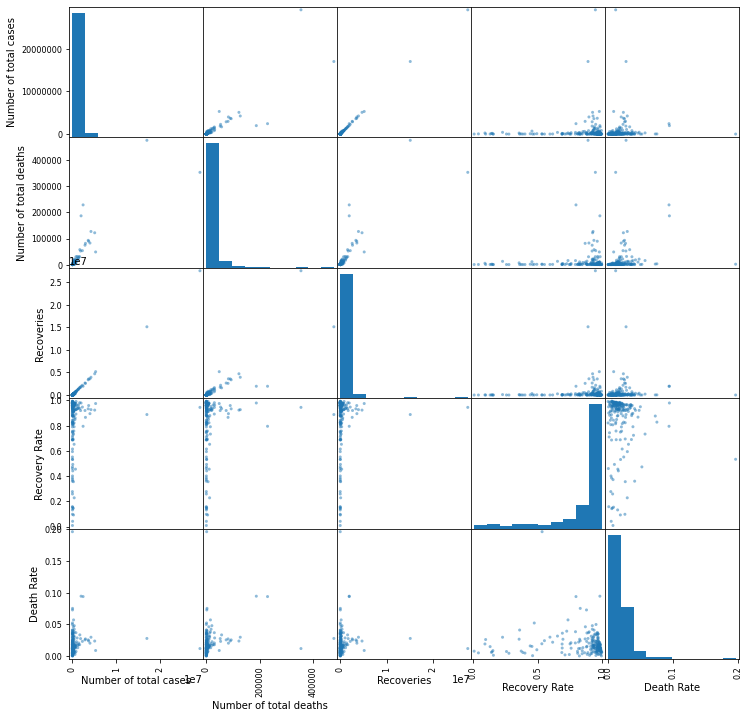

In [13]:
# Visualization 4

pd.plotting.scatter_matrix(data, figsize = (12,12));

### Analysis 

We will use a linear regression to answer our question: Can we predict which countries have greater death rate based on their total number of cases? 

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data[['Number of total cases']],data['Death Rate'],random_state=1)
model = LinearRegression()
model.fit(Xtrain,ytrain)
print('model.coef_: ',model.coef_)
print('model.intercept: ',model.intercept_)

model.coef_:  [2.31844002e-10]
model.intercept:  0.01991245712659999


In [15]:
# Model Equation

print('Formula: Death Rate = Number of total cases *', model.coef_ ,'+', model.intercept_)

Formula: Death Rate = Number of total cases * [2.31844002e-10] + 0.01991245712659999


In [16]:
# R^2 value for the training data

train_r2 = model.score(Xtrain,ytrain)
print('training data R^2: ', train_r2)

training data R^2:  0.0010259584137197741


In [17]:
# R^2 value for the testing data

test_r2 = model.score(Xtest,ytest)
print('testing data R^2: ', test_r2)

testing data R^2:  -0.008376786156278015


In [18]:
# Predict labels of the data values based on trained model

y_model = model.predict(Xtest)

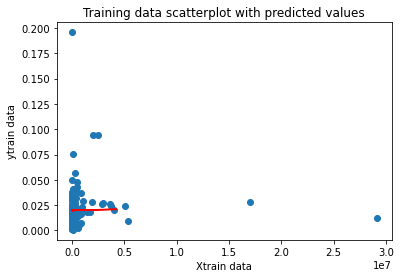

In [19]:
# Scatterplot of training data

plt.scatter(Xtrain,ytrain)
plt.title('Training data scatterplot with predicted values')
plt.ylabel('ytrain data')
plt.xlabel('Xtrain data')
plt.plot(Xtest,y_model,color='r')

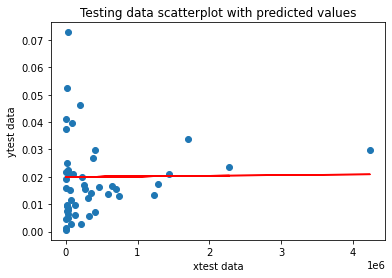

In [20]:
# Scatterplot of testing data

plt.scatter(Xtest,ytest)
plt.title('Testing data scatterplot with predicted values')
plt.ylabel('ytest data')
plt.xlabel('xtest data')
plt.plot(Xtest,y_model,color='r')

# Ethics & Privacy

The main concerns we discussed at the beginning before starting this as a group was we do not wanna share anything personal of the patients and deaths reported due to Covid. Not only because it is an invasion of privacy but because it is disrespectful to those that tragically died due to Covid.

Our data does not include any potential biases that can cause problems for anyone viewing. As a group we made sure the data stayed limited to the number of cases and deaths. We did not include anything else that can be seen as too personal beyond that.

To be completely honest, the issues we ran into were not necessarily issues regarding data privacy because as we mentioned before, we limited our data to only numbers of deaths and patients dealing with Covid. We did not want to include names or anything that can cause us problems.

If we were to have run into problems regarding data privacy, the way we would have dealt with this and the way we did deal with this is to limit our data to what is only important. We did not want to include names of patients because that would not be just to anyone, both the families and us. Another way made sure to prevent any unnecessary data privacy to make sure if we found articles that include names of individuals specifically, we would just use another article to save us the trouble from  using the names of patients recovering from Covid. To conclude, we tried our absolute best to only mention relevant data to help us answer our topic.

# Conclusion & Discussion

From our analysis, we found that we are unable to conclude whether or not we can predict which countries have greater death rates based on their total number of covid cases. Our analysis used a linear regression approach from machine learning. Our analysis shows that our model created an R^2 value of -0.008 for the testing data, meaning that it explains -.8% of the variation in our data. 

Our model generated a simple equation for death rate due to COVID-19 per country: Death Rate = Number of total cases * [2.318e-10] + 0.0199

The R^2 value of our training data was low (0.001). Our R^2 value for our testing data is also low, so we rejected our hypothesis and concluded that there was no significance. 

Discussion & Limitations 

This conclusion disagrees with our initial hypothesis that countries who have more COVID-19 cases have a higher death rate. Our model only had data from countries who had reported their positive cases, thus causing a limitation. This is a factor that contributes to the potential inaccuracy from our results, along with other factors such as COVID positive people not taking a test to recieve a positive result. Our data was also taken from a datascience website, rather than the CDC or other countries health departments. The data that we analyzed were only from countries who had data for all measures needed to complete the anlysis. We also used a linear model which is limited in accuracy. 

We were able to complete this study with the basic datascience knowledge that we have gained from this 20-week course. If we had more experience with datascience, or more time to try out other models, we could improve the accuracy of our model and results.  

# Team Contributions

Jade Vasquez - Overview, Background, Hypothesis, Dataset selection, Data cleaning, Data visualization, Data analysis, Conclusion & Discussion

Alexandra Mendoza - Background, Hypothesis, Dataset Selection, Ethics & Privacy

Jesus Mendez - Background, Hypothesis, Dataset Selection, Ethics & Privacy

Masiah Manzano - Data analysis, Dataset selection